<a href="https://colab.research.google.com/github/wappossa/teste/blob/main/Projeto_M%C3%B3dulo_01_Bootcamp_DataScience_Alura.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Seja bem-vindo ao primeiro projeto do Bootcamp Alura de Data Science feito por mim, Alejandro Aviles.

Utilizando todo o conhecimento aplicado nas aulas e buscando agregar as análises já feitas durante as aulas com as bases de gastos hospitalares por UF e mês de atendimento, extraídas do TABNET, tentei analisar alguma tendencia de crescimento concomitante, entre Mar/2020 e Set/2021, entre os casos de covid e os gastos hospitalares em mãos. 

Partindo desta hipótese, de que ambos dados tem alguma correlação, vamos construir dois gráficos com esses dados ( % em relação à população de cada estado) e comparar suas tendência de crescimento.

Boa jornada!

Início do projeto.
Bibliotecas Pandas e Numpy importadas.

In [303]:
import pandas as pd
import numpy as np

Dados extraídos das bases públicas do governo
https://data.brasil.io/dataset/covid19/caso_full.csv.gz

In [304]:
dados_covid=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/caso_full.csv')

Aqui filtramos a coluna 'place_type' pelo valor 'state'. Nessa tabela, existem dados de cidades também, porém o objetivo aqui é fazer uma análise mais abrangente e, por isso, não iremos focar nas cidades por agora.


In [305]:
teste_state=dados_covid.loc[dados_covid.place_type=='state']
teste_state

,city,city_ibge_code,date,epidemiological_week,estimated_population,estimated_population_2019,is_last,is_repeated,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,last_available_date,last_available_death_rate,last_available_deaths,order_for_place,place_type,state,new_confirmed,new_deaths
1,NaN,12.00000,2020-03-17,202012,894470.00000,881935.00000,False,False,3,0.33539,2020-03-17,0.00000,0,1,state,AC,3,0
3,NaN,12.00000,2020-03-18,202012,894470.00000,881935.00000,False,False,3,0.33539,2020-03-18,0.00000,0,2,state,AC,0,0
5,NaN,12.00000,2020-03-19,202012,894470.00000,881935.00000,False,False,4,0.44719,2020-03-19,0.00000,0,3,state,AC,1,0
7,NaN,12.00000,2020-03-20,202012,894470.00000,881935.00000,False,False,7,0.78259,2020-03-20,0.00000,0,4,state,AC,3,0
9,NaN,12.00000,2020-03-21,202012,894470.00000,881935.00000,False,False,11,1.22978,2020-03-21,0.00000,0,5,state,AC,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3106159,NaN,17.00000,2021-11-10,202145,1590248.00000,1572866.00000,False,False,230090,14468.81241,2021-11-10,0.01690,3896,603,state,TO,161,3
3106299,NaN,17.00000,2021-11-11,202145,1590248.00000,1572866.00000,False,False,230281,14480.82312,2021-11-11,0.01690,3897,604,state,TO,191,1
3106439,NaN,17.00000,2021-11-12,202145,1590248.00000,1572866.00000,True,False,230402,14488.43199,2021-11-12,0.01690,3898,605,state,TO,121,1
3106579,NaN,17.00000,2021-11-13,202145,1590248.00000,1572866.00000,False,True,230402,14488.43199,2021-11-12,0.01690,3898,606,state,TO,0,0


Da mesma forma que vamos focar em estados e não cidades, para facilitar as nossas análises sem prejuízo de informação, vamos converter os dias presentes na coluna 'date' para valores em ano e mês numa nova coluna: 'Anomes' . Também, para simplificar a análise, escolhi os 6 estados com mais gastos acumulados na série histórica extraída: SP, PR, RJ, RS, BA e MG.

In [306]:
teste_state['Anomes']=teste_state['date'].str.slice(0,4) + teste_state['date'].str.slice(5,7)
teste_state=teste_state.loc[(teste_state.state=='BA')|(teste_state.state=='MG')|(teste_state.state=='SP')|(teste_state.state=='RS')|(teste_state.state=='PR')|(teste_state.state=='RJ')]

teste_state

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,city,city_ibge_code,date,epidemiological_week,estimated_population,estimated_population_2019,is_last,is_repeated,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,last_available_date,last_available_death_rate,last_available_deaths,order_for_place,place_type,state,new_confirmed,new_deaths,Anomes
117421,NaN,29.00000,2020-03-06,202010,14930634.00000,14873064.00000,False,False,1,0.00670,2020-03-06,0.00000,0,1,state,BA,1,0,202003
117423,NaN,29.00000,2020-03-07,202010,14930634.00000,14873064.00000,False,False,2,0.01340,2020-03-07,0.00000,0,2,state,BA,1,0,202003
117425,NaN,29.00000,2020-03-08,202011,14930634.00000,14873064.00000,False,True,2,0.01340,2020-03-07,0.00000,0,3,state,BA,0,0,202003
117427,NaN,29.00000,2020-03-09,202011,14930634.00000,14873064.00000,False,False,2,0.01340,2020-03-09,0.00000,0,4,state,BA,0,0,202003
117429,NaN,29.00000,2020-03-10,202011,14930634.00000,14873064.00000,False,False,2,0.01340,2020-03-10,0.00000,0,5,state,BA,0,0,202003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3026981,NaN,35.00000,2021-11-10,202145,46289333.00000,45919049.00000,False,False,4415745,9539.44400,2021-11-10,0.03450,152538,625,state,SP,1558,9,202111
3027628,NaN,35.00000,2021-11-11,202145,46289333.00000,45919049.00000,False,False,4417592,9543.43412,2021-11-11,0.03450,152539,626,state,SP,1847,1,202111
3028275,NaN,35.00000,2021-11-12,202145,46289333.00000,45919049.00000,False,False,4420263,9549.20435,2021-11-12,0.03460,152953,627,state,SP,2671,414,202111
3028922,NaN,35.00000,2021-11-13,202145,46289333.00000,45919049.00000,False,False,4421955,9552.85962,2021-11-13,0.03460,153058,628,state,SP,1692,105,202111


Devido aos dados filtrados  estarem distríbuídos em registros diários, vamos agrupá-los por estado, o valor de população estimada de cada estado e o Ano e mês que geramos anteriormente. A variável escolhida para ser somada nesse agrupamento foi a de novos casos confirmados ('new_confirmed'). É através dela que faremos as nossas inferências acerca da hipótese levantada: a correlação entre o aumento de casos e os gastos hospitalares realizados em cada estado. Importante ressaltar que poderíamos utilizar também os dados de mortes confirmadas por estado ('new_deaths'), mas haveriam problemas ao analisár tal número sob a ótica de nossa análise. Por exemplo, cada estado tem uma rede de saúde prória, de tamanhos diferentes e, durante a pandemia, cada estado adotou políticas de flexibilização diferentes que podem interferir nesse dado diretamente. Tais fatores prejudicam nossa análise vis a vis os gastos realizados e, por isso, não entraremos nessa seara.

Por questões de configuração de indexadores ao aplicar a função .groupby no nosso dataframe, convertemos todos os indexadores em colunas, para facilitar os cálculos futuros.

In [414]:
state_data_complete=teste_state.groupby(['state','estimated_population','Anomes']).agg(new_confirmed_tot=('new_confirmed','sum'))
state_data_complete['state']=state_data_complete.index.get_level_values('state').tolist() 
state_data_complete['estimated_population']=state_data_complete.index.get_level_values('estimated_population').tolist() 
state_data_complete['Anomes']=state_data_complete.index.get_level_values('Anomes').tolist() 
state_data_complete.reset_index(drop=True, inplace=True) 
state_data_complete


,new_confirmed_tot,state,estimated_population,Anomes,perc_confirmed_pop
0,217,BA,14930634.00000,202003,0.00145
1,2650,BA,14930634.00000,202004,0.01775
2,15525,BA,14930634.00000,202005,0.10398
3,54915,BA,14930634.00000,202006,0.36780
4,92847,BA,14930634.00000,202007,0.62186
...,...,...,...,...,...
122,330520,SP,46289333.00000,202107,0.71403
123,204816,SP,46289333.00000,202108,0.44247
124,103448,SP,46289333.00000,202109,0.22348
125,39945,SP,46289333.00000,202110,0.08629


Agora criamos uma nova coluna ('perc_confirmed_pop'), que não é nada mais, nada menos que o percentual de novos casos confirmados totais em relação à população do estado (campo 'new_confirmed_tot' / campo 'estimated_population') 

In [418]:
state_data_complete['perc_confirmed_pop']=state_data_complete['new_confirmed_tot']/state_data_complete['estimated_population']*100
state_data_complete

,new_confirmed_tot,state,estimated_population,Anomes,perc_confirmed_pop
0,217,BA,14930634.00000,202003,0.00145
1,2650,BA,14930634.00000,202004,0.01775
2,15525,BA,14930634.00000,202005,0.10398
3,54915,BA,14930634.00000,202006,0.36780
4,92847,BA,14930634.00000,202007,0.62186
...,...,...,...,...,...
122,330520,SP,46289333.00000,202107,0.71403
123,204816,SP,46289333.00000,202108,0.44247
124,103448,SP,46289333.00000,202109,0.22348
125,39945,SP,46289333.00000,202110,0.08629


Nessa parte do código, fazemos alguns tratamentos importantes para geração do nosso gráfico final de evolução de novos casos. Pivotamos a tabela, deixando estados nos registros e os Ano e Mes nas colunas. Os nomes das colunas são ajustados para melhor interpretação e padronização. Repare que o ano e mês 202002 foi removido. Isso se deu devido a, nesse ano e mês, apenas o estado de SP apresentar dados, era u início da pandemia. Optou-se, portante, em remover tais dados do dataframe.

In [416]:
pivot_complete= pd.pivot_table(state_data_complete, values=['perc_confirmed_pop'], index=['state'],
                    columns=['Anomes'], aggfunc={'perc_confirmed_pop':np.sum})
pivot_complete['Total']=pivot_complete.T[pivot_complete.T.columns[:]].sum()
pivot_complete.sort_values("Total", ascending=False, inplace=True)
pivot_complete.columns = pivot_complete.columns.to_flat_index()
pivot_complete.columns = ['_'.join(column) for column in pivot_complete.columns]
pivot_complete.drop('perc_confirmed_pop_202002', inplace=True, axis=1)

pivot_complete.rename(columns = {'perc_confirmed_pop_202003': '2020/Mar', 'perc_confirmed_pop_202004': '2020/Abr'}, inplace = True)
pivot_complete.rename(columns = {'perc_confirmed_pop_202005': '2020//Mai', 'perc_confirmed_pop_202006': '2020/Jun'}, inplace = True)
pivot_complete.rename(columns = {'perc_confirmed_pop_202007': '2020/Jul', 'perc_confirmed_pop_202008': '2020/Ago'}, inplace = True)
pivot_complete.rename(columns = {'perc_confirmed_pop_202009': '2020/Set', 'perc_confirmed_pop_202010': '2020/Out'}, inplace = True)
pivot_complete.rename(columns = {'perc_confirmed_pop_202011': '202/Nov', 'perc_confirmed_pop_202012': '2020/Dez'}, inplace = True)
pivot_complete.rename(columns = {'perc_confirmed_pop_202101': '2021/Jan', 'perc_confirmed_pop_202102': '2021/Fev'}, inplace = True)
pivot_complete.rename(columns = {'perc_confirmed_pop_202103': '2021/Mar', 'perc_confirmed_pop_202104': '2021/Abr'}, inplace = True)
pivot_complete.rename(columns = {'perc_confirmed_pop_202105': '2021/Mai', 'perc_confirmed_pop_202106': '2021/Jun'}, inplace = True)
pivot_complete.rename(columns = {'perc_confirmed_pop_202107': '2021/Jul', 'perc_confirmed_pop_202108': '2021/Ago'}, inplace = True)
pivot_complete.rename(columns = {'perc_confirmed_pop_202109': '2021/Set', 'perc_confirmed_pop_202110': '2021/Out'}, inplace = True)
pivot_complete.rename(columns = {'perc_confirmed_pop_202111': '2021/Nov'}, inplace = True)
pivot_complete.drop('Total_', inplace=True, axis=1)
pivot_completex=pivot_complete.sort_index()
pivot_completex

,2020/Mar,2020/Abr,2020//Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,202/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,2021/Abr,2021/Mai,2021/Jun,2021/Jul,2021/Ago,2021/Set,2021/Out,2021/Nov
state,,,,,,,,,,,,,,,,,,,,,
BA,0.00145,0.01775,0.10398,0.36780,0.62186,0.60663,0.36033,0.28553,0.33431,0.60499,0.63431,0.64251,0.80122,0.65086,0.74584,0.75545,0.46009,0.18153,0.08712,0.08370,0.03954
MG,0.00129,0.00729,0.04056,0.16220,0.38560,0.42010,0.36920,0.29964,0.26941,0.59445,0.89973,0.67732,1.15161,1.10472,0.99972,1.08837,0.76447,0.46877,0.34773,0.21082,0.05920
PR,0.00161,0.01075,0.02891,0.15738,0.46224,0.48446,0.40803,0.30029,0.57830,1.18506,1.15281,0.84831,1.72854,0.88209,1.26594,1.66118,0.81789,0.68533,0.46523,0.38009,0.12224
RJ,0.00408,0.05036,0.25299,0.34102,0.30452,0.33477,0.23697,0.26024,0.25554,0.46236,0.49705,0.35746,0.37332,0.54554,0.70682,0.53458,0.42404,0.55468,0.90731,0.20935,0.06157
RS,0.00267,0.01072,0.06831,0.15415,0.34799,0.51756,0.56692,0.49903,0.65204,1.11719,0.85449,0.81977,1.78987,1.13446,0.96782,1.13802,1.33406,0.35862,0.24590,0.26244,0.11383
SP,0.00505,0.05694,0.17499,0.37089,0.56368,0.56609,0.39164,0.28192,0.27118,0.47666,0.68066,0.57089,0.92510,0.93728,0.79572,0.98361,0.71403,0.44247,0.22348,0.08629,0.03531


Temos um dataset já pronto, que é o de % de novos casos por população de cada estado, mês a mês, desde o início da pandemia (2020/Mar). Agora, vamos aos gastos, tabela conhecida por todos aqueles que fizeram o primeiro módulo do BootCamp.

Carregamos a tabela de gastos por estado e mês de atendimento e formatamos a coluna 'state' pros 6 estados que selecionamos previamente para esta análise. Feito isso, já conseguimos o dataframe que necessitamos para comparação.

In [421]:
dados = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dados_tabnet_gastos_por_data_atendimento_UF.csv', encoding='ISO-8859-1', skiprows=3,sep=';', skipfooter=12,thousands='.',decimal=',')
dados_gastos=dados[dados.columns[273:292]]
dados_gastos['state']=dados['Unidade da Federação']
pd.options.display.float_format = '{:.5f}'.format
dados_gastos_estados_selec=dados_gastos.loc[(dados_gastos.state=='29 Bahia')|(dados_gastos.state=='31 Minas Gerais')|(dados_gastos.state=='35 São Paulo')|(dados_gastos.state=='43 Rio Grande do Sul')|(dados_gastos.state=='41 Paraná')|(dados_gastos.state=='33 Rio de Janeiro')]

def change(f):
    if f=='29 Bahia':
        return 'BA' 
    if f=='31 Minas Gerais':
        return 'MG'
    if f=='35 São Paulo':
        return 'SP'
    if f=='41 Paraná':
        return 'PR'
    if f=='43 Rio Grande do Sul':
        return 'RS'
    else:
        return 'RJ'

Estado=dados_gastos_estados_selec['state']
Estado = [change(el) for el in Estado]
dados_gastos_estados_selec=dados_gastos_estados_selec.assign(state=Estado)
dados_gastos_estados_selec=dados_gastos_estados_selec.set_index("state")
dados_gastos_estados_selec=dados_gastos_estados_selec.astype(float)
dados_gastos_estados_selec=dados_gastos_estados_selec.sort_index()
# dados_gastos_estados_selec.T.plot(figsize=(12,6)).legend(bbox_to_anchor=(.75, -.05),ncol=6)
dados_gastos_estados_selec

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,2021/Abr,2021/Mai,2021/Jun,2021/Jul,2021/Ago,2021/Set
state,,,,,,,,,,,,,,,,,,,
BA,71049024.63000,60152167.47000,66497113.63000,78810602.01000,91153937.01000,86261428.56000,78309124.61000,83250295.33000,83082385.00000,87649577.75000,88213804.44000,96878079.79000,117816174.41000,115928975.22000,134229720.19000,120516112.40000,95691895.48000,61645689.06000,24858284.14000
MG,147799520.26000,127480989.93000,142761094.95000,157369579.21000,177805173.34000,181998949.08000,181451915.01000,175473368.10000,172730921.65000,181833354.32000,192844182.05000,183891512.07000,261376726.91000,255545757.83000,275151838.35000,249713866.70000,194734136.81000,139157823.59000,60010941.33000
PR,114786294.43000,97864870.48000,111041855.77000,115300344.79000,124140612.85000,126394553.17000,123625844.14000,129019948.52000,135278692.53000,129212815.78000,130532844.63000,134077150.52000,172636232.13000,174040312.61000,191861617.22000,163580936.16000,119408026.56000,91187722.64000,32660877.10000
RJ,74765692.76000,69535880.11000,89798184.38000,88313855.84000,96304377.52000,90121461.58000,82329596.82000,81646060.70000,83923869.68000,96752689.81000,103468410.54000,87518760.94000,125735135.97000,132965058.07000,145372684.38000,124909043.81000,113660882.20000,94137361.39000,43133058.07000
RS,84895799.05000,76832181.55000,87814477.98000,96822233.82000,108563752.53000,111791116.08000,110216942.03000,114042222.77000,117696633.24000,120291289.00000,115991861.17000,126730284.94000,169687680.33000,145302546.19000,155084262.06000,142812283.70000,112805351.92000,74954589.62000,25200345.68000
SP,278222860.99000,255370111.27000,314486613.84000,328537654.96000,362450170.46000,351185567.14000,339906526.85000,329830060.31000,328687791.75000,338634303.39000,361427087.80000,352846447.86000,502905607.53000,504427182.45000,548112705.83000,503160959.54000,404373175.61000,301986341.98000,130535317.64000


Repare que os dados do dataframe acimas estão em valores absolutos. Precisamos dividí-los pela quantidade de habitantes de cada estado. Os dados referentes a ocorrências de Covid-19 já vinham com esses dados populacionais embutidos. Portanto, precisamos agora juntar os dados de população do primeiro dataframe Covid no nosso dataframe de gastos. O ideal é usar o mesmo dado populacional para obtenção dos percentuais de gastos e de novos casos de Covid, assim garantimos que não haverá nenhuma distorção de análise por conta de dados de mesma natureza e de origens diferentes.

Agora vamos extrair do primeiro dataframe (pivot_completex) apenas esses dados.

In [422]:
dados_pop_estado=teste_state[['state','estimated_population']]
dados_pop_estado = dados_pop_estado.drop_duplicates(subset=["state", "estimated_population"])
dados_pop_estado

,state,estimated_population
117421,BA,14930634.00000
761236,MG,21292666.00000
1780760,PR,11516840.00000
1999913,RJ,17366189.00000
2189388,RS,11422973.00000
2666699,SP,46289333.00000


Unindo o dataframe acima (dados_pop_estado) ao nosso dataframe de gastos (dados_gastos_estados_selec), conseguimos realizar obter os gastos per capita de cada estado, como desejávamos.

In [428]:
gastos_per_capita_uf = pd.merge(dados_gastos_estados_selec, dados_pop_estado, how='left', on = 'state')
gastos_per_capita_uf=gastos_per_capita_uf.set_index('state')
gastos_per_capita_uf=gastos_per_capita_uf.astype(float)
gastos_per_capita_uf=gastos_per_capita_uf.iloc[:,:19].div(gastos_per_capita_uf['estimated_population'], axis=0)
# df_cd.T.plot(figsize=(12,6)).legend(bbox_to_anchor=(.75, -.05),ncol=6)
gastos_per_capita_uf

,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,2021/Abr,2021/Mai,2021/Jun,2021/Jul,2021/Ago,2021/Set
state,,,,,,,,,,,,,,,,,,,
BA,4.75861,4.02878,4.45374,5.27845,6.10516,5.77748,5.24486,5.57580,5.56456,5.87045,5.90824,6.48854,7.89090,7.76450,8.99022,8.07173,6.40910,4.12881,1.66492
MG,6.94133,5.98708,6.70471,7.39079,8.35054,8.54749,8.52180,8.24102,8.11223,8.53972,9.05684,8.63638,12.27543,12.00159,12.92238,11.72769,9.14560,6.53548,2.81839
PR,9.96682,8.49755,9.64169,10.01146,10.77905,10.97476,10.73435,11.20272,11.74616,11.21947,11.33409,11.64183,14.98990,15.11181,16.65922,14.20363,10.36812,7.91777,2.83592
RJ,4.30524,4.00410,5.17086,5.08539,5.54551,5.18948,4.74080,4.70144,4.83260,5.57133,5.95804,5.03961,7.24023,7.65655,8.37102,7.19266,6.54495,5.42073,2.48374
RS,7.43202,6.72611,7.68753,8.47610,9.50398,9.78652,9.64871,9.98359,10.30350,10.53065,10.15426,11.09433,14.85495,12.72020,13.57652,12.50220,9.87531,6.56174,2.20611
SP,6.01052,5.51682,6.79393,7.09748,7.83010,7.58675,7.34309,7.12540,7.10072,7.31560,7.80800,7.62263,10.86440,10.89727,11.84102,10.86991,8.73577,6.52389,2.81999


Por fim, vamos plotar ambos datasets (pivot_completex e gastos_per_capita_uf) lado a lado para avaliarmos a hipótese levantada inicialmente, de que os gastos hospitalares per capita devem crescer com o aumento % de casos de Covid 19 por estado. 

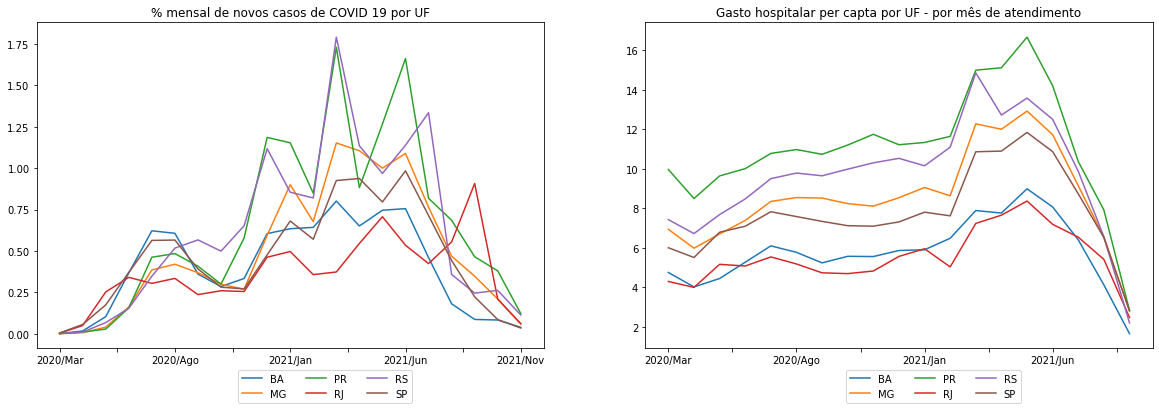

In [434]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=1, ncols=2)

pivot_completex.T.plot(figsize=(12,6),ax=axes[0],title='% mensal de novos casos de COVID 19 por UF').legend(bbox_to_anchor=(.75, -.05),ncol=3)

df_cd.T.plot(figsize=(20,6),ax=axes[1],title='Gasto hospitalar per capta por UF - por mês de atendimento').legend(bbox_to_anchor=(.75, -.05),ncol=3)

Podemos, das imagens acima, obter algumas conclusões preciosas:

      1-Os estados mais populacionais não são aqueles que de fato recebem mais recursos per capita para tratamento da sua população. Temos, no topo de gastos per capita, os estados do Paraná (PR, população 11,5 MM) e do Rio Grande do Sul (RS, população 11,4 MM). Contudo, os demais estados todos tem populações maiores (BA: 14,9 MM, RJ: 17,4MM, MG: 21,3 MM e SP: 46,3 MM) 

      2-É possível sim que nossa hipótese inicial, de que o gasto per capita por UF venha crescendo devido ao aumento de casos de COVID 19 entre os meses de Mar/2020 e Set/2021. Temos dois fatores que podem corroborar nossa hipótese:
            2.1-As tendências de crescimento no período, apesar de não terem inclunação igual, coexistem.
            2.2-Os estados que mais possuem gastos per capita tendem a ser aqueles com maior número de casos no período. Podemos obervar que a ordem de valores dos estados, para ambos os gráficos, se mantem similares, com PR e RS na liderança e BA e RJ no limite inferior.

  Para reforçar a nossa análise, seria necessário reunir um conjunto de dados maior, o qual pudesse reforçar nossa hipótese. 
Por exemplo, os gastos podem ter tal crescimento no período por uma questão orgânica e de acordo com taxas históricas, o que derrubaria nossa hipótese. A existência de doenças concomitantes, cenário político e incompletude dos dados analisados (que podem vir a mudar devido aos gastos terem sido analisados sob a ótica de mês de atendimento, ou seja, ainda há valores históricos a serem apurados) podem mudar o resultado de nossas análises. Além disso, análises estatísticas de correlação entre os dados colaborariam para melhores  conclusões, e estas não foram aplicadas nesse estudo. 

Espero que tenham apreciado tal análise, estou no caminho do aprendizado de data science e buscando impactar positivamente os ambientes nos quais trabalho, trazendo razão e dados para a mesa. Abraço!
